In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.interpolate
import matplotlib.pyplot as plt

In [2]:
# The Black Scholes Formula
# CallorPut
# S - Stock price (known)
# K - Strike price (known)
# T - Time to maturity (known)
# r - Riskfree interest rate (can be found)
# d - Dividend yield (KNown(?))
# v - Volatility (given)

def BlackScholes(CallorPut, S, K, T, r, d, v):
    d1 = (np.log(float(S)/K)+((r-d) + v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1 - v*np.sqrt(T)
    
    if CallorPut == 'Call':
        return S*np.exp(-d*T)*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp(-d*T)*norm.cdf(-d1)
    
##THIS WORKS DON'T TOUCH np

In [3]:
options = pd.read_csv('opt_port.csv')
options

,Maturity,Days,RF rate,Underlying,PutorCall,BoughtSold,Number of Shares,Strike,Vol,Div Yield,Spot
0,9/12/2019,129,0.010187,BHP,Call,Bought,20000,39.0,0.2600,0.0414,38.78
1,8/03/2020,219,0.009705,CBA,Put,Bought,15000,75.0,0.2798,0.0580,81.88
2,12/04/2020,254,0.009443,CBA,Call,Bought,15000,75.0,0.2798,0.0580,81.88
3,4/05/2020,276,0.009289,WESP,Put,Bought,25000,38.1,0.3056,0.0567,38.86
4,7/08/2020,371,0.009026,WESP,Call,Bought,20000,39.0,0.3298,0.0567,38.86
5,6/11/2020,462,0.008754,WPL,Call,Sold,10000,35.0,0.2845,0.0603,33.81
6,6/12/2020,492,0.008665,WPL,Put,Bought,15000,33.0,0.2700,0.0603,33.81


In [4]:
opt_list=(0,1,2,3,4,5,6)
options['BS_Price'] = ""
options

,Maturity,Days,RF rate,Underlying,PutorCall,BoughtSold,Number of Shares,Strike,Vol,Div Yield,Spot,BS_Price
0,9/12/2019,129,0.010187,BHP,Call,Bought,20000,39.0,0.2600,0.0414,38.78,
1,8/03/2020,219,0.009705,CBA,Put,Bought,15000,75.0,0.2798,0.0580,81.88,
2,12/04/2020,254,0.009443,CBA,Call,Bought,15000,75.0,0.2798,0.0580,81.88,
3,4/05/2020,276,0.009289,WESP,Put,Bought,25000,38.1,0.3056,0.0567,38.86,
4,7/08/2020,371,0.009026,WESP,Call,Bought,20000,39.0,0.3298,0.0567,38.86,
5,6/11/2020,462,0.008754,WPL,Call,Sold,10000,35.0,0.2845,0.0603,33.81,
6,6/12/2020,492,0.008665,WPL,Put,Bought,15000,33.0,0.2700,0.0603,33.81,


In [5]:

for x in opt_list:
    maturity = (options.iloc[x, 1]/365)
    options.iloc[x, 11] = BlackScholes( options.iloc[x, 4], #callorput
                 options.loc[x, 'Spot'], #spot
                 options.loc[x, 'Strike'], #Strike
                 maturity, # T 
                 options.iloc[x, 2], #RF rate
                 options.iloc[x, 9], #div yield
                 options.iloc[x, 8] #vol
                )
    

In [6]:
options

,Maturity,Days,RF rate,Underlying,PutorCall,BoughtSold,Number of Shares,Strike,Vol,Div Yield,Spot,BS_Price
0,9/12/2019,129,0.010187,BHP,Call,Bought,20000,39.0,0.2600,0.0414,38.78,2.06629
1,8/03/2020,219,0.009705,CBA,Put,Bought,15000,75.0,0.2798,0.0580,81.88,4.61319
2,12/04/2020,254,0.009443,CBA,Call,Bought,15000,75.0,0.2798,0.0580,81.88,9.36883
3,4/05/2020,276,0.009289,WESP,Put,Bought,25000,38.1,0.3056,0.0567,38.86,4.27658
4,7/08/2020,371,0.009026,WESP,Call,Bought,20000,39.0,0.3298,0.0567,38.86,4.05331
5,6/11/2020,462,0.008754,WPL,Call,Sold,10000,35.0,0.2845,0.0603,33.81,2.74806
6,6/12/2020,492,0.008665,WPL,Put,Bought,15000,33.0,0.2700,0.0603,33.81,4.73654


In [7]:
options['Price'] = options['BS_Price'] * options['Number of Shares']

In [8]:
options

,Maturity,Days,RF rate,Underlying,PutorCall,BoughtSold,Number of Shares,Strike,Vol,Div Yield,Spot,BS_Price,Price
0,9/12/2019,129,0.010187,BHP,Call,Bought,20000,39.0,0.2600,0.0414,38.78,2.06629,41325.9
1,8/03/2020,219,0.009705,CBA,Put,Bought,15000,75.0,0.2798,0.0580,81.88,4.61319,69197.9
2,12/04/2020,254,0.009443,CBA,Call,Bought,15000,75.0,0.2798,0.0580,81.88,9.36883,140532
3,4/05/2020,276,0.009289,WESP,Put,Bought,25000,38.1,0.3056,0.0567,38.86,4.27658,106914
4,7/08/2020,371,0.009026,WESP,Call,Bought,20000,39.0,0.3298,0.0567,38.86,4.05331,81066.1
5,6/11/2020,462,0.008754,WPL,Call,Sold,10000,35.0,0.2845,0.0603,33.81,2.74806,27480.6
6,6/12/2020,492,0.008665,WPL,Put,Bought,15000,33.0,0.2700,0.0603,33.81,4.73654,71048.1


In [9]:
# Black Scholes Call Delta 
# S - Stock price 
# K - Strike price 
# T - Time to maturity 
# r - Riskfree interest rate (can be found)
# d - Dividend yield 
# v - Volatility 
def bsdelta_call(S, K, T, r, d, v):
    if S>0 and K>0 and v!=0 and T > 0:
        
        term1 = np.log(S / K) + (r - d) * T
        term2 = v * v * T
        term3 = np.sqrt(term2)
        term4 = term2/2
        
        dPlus = (term1 + term4) / term3
        
        bsdelta_call = np.exp(-d * T) * norm.cdf(dPlus)
        
        return bsdelta_call
        
    else:
        
        bsdelta_call = 0
        return bsdelta_call

In [10]:
# Black Scholes put delta 
# S - Stock price 
# K - Strike price 
# T - Time to maturity 
# r - Riskfree interest rate (can be found)
# d - Dividend yield 
# v - Volatility 
def bsdelta_put(S, K, T, r, d, v):
    if S>0 and K>0 and v!=0 and T > 0:
        
        term1 = np.log(S / K) + (r - d) * T
        term2 = v * v * T
        term3 = np.sqrt(term2)
        term4 = term2/2
        
        dPlus = (term1 + term4) / term3
        
        bsdelta_put = -np.exp(-d * T) * norm.cdf(-dPlus)
        
        return bsdelta_put
        
    else:
        
        bsdelta_put = -np.exp(-d * T)
        return bsdelta_put

In [11]:
options['Delta'] = ""

for x in opt_list:
    maturity = (options.iloc[x, 1]/365)
    
    if options.iloc[x, 4] == 'Call':
        options.iloc[x, 13] =  bsdelta_call(options.iloc[x, 10], #spot
                 options.iloc[x, 7], #Strike
                 maturity, # T 
                 options.iloc[x, 2], #RF rate
                 options.iloc[x, 9], #div yield
                 options.iloc[x, 8] #vol
                )
        #return bsdelta_call
        
    elif options.iloc[x, 4] == 'Put':
        options.iloc[x, 13] = bsdelta_put(options.iloc[x, 10], #spot
                 options.iloc[x, 7], #Strike
                 maturity, # T 
                 options.iloc[x, 2], #RF rate
                 options.iloc[x, 9], #div yield
                 options.iloc[x, 8] #vol
                 )
        
        #return bsdelta_put
                     
    else:
        0

In [12]:
options

,Maturity,Days,RF rate,Underlying,PutorCall,BoughtSold,Number of Shares,Strike,Vol,Div Yield,Spot,BS_Price,Price,Delta
0,9/12/2019,129,0.010187,BHP,Call,Bought,20000,39.0,0.2600,0.0414,38.78,2.06629,41325.9,0.480676
1,8/03/2020,219,0.009705,CBA,Put,Bought,15000,75.0,0.2798,0.0580,81.88,4.61319,69197.9,-0.340071
2,12/04/2020,254,0.009443,CBA,Call,Bought,15000,75.0,0.2798,0.0580,81.88,9.36883,140532,0.610902
3,4/05/2020,276,0.009289,WESP,Put,Bought,25000,38.1,0.3056,0.0567,38.86,4.27658,106914,-0.451411
4,7/08/2020,371,0.009026,WESP,Call,Bought,20000,39.0,0.3298,0.0567,38.86,4.05331,81066.1,0.47565
5,6/11/2020,462,0.008754,WPL,Call,Sold,10000,35.0,0.2845,0.0603,33.81,2.74806,27480.6,0.407337
6,6/12/2020,492,0.008665,WPL,Put,Bought,15000,33.0,0.2700,0.0603,33.81,4.73654,71048.1,-0.456532


In [13]:
shares = pd.read_csv('Physical_shares.csv')
shares['Spot'] = (38.79, 94.77, 81.88, 38.86, 33.81, 28.51, 3.98)
shares

,Issuer,Number of Shares,Bought/Sold,Spot
0,BHP,5000,Bought,38.79
1,RIO,3000,Bought,94.77
2,CBA,4000,Bought,81.88
3,WESP,10000,Sold,38.86
4,WPL,5000,Bought,33.81
5,NAB,15000,Sold,28.51
6,TLS,30000,Sold,3.98


In [14]:
sharedata = pd.read_csv('RSKMShares.csv', index_col = 'Date', parse_dates = True)
sharedata.columns = [ 'ASX200', 'BHP', 'RIO', 'CBA', 'WESP', 'WPL', 'NAB', 'TLS']
sharedata.tail()

,ASX200,BHP,RIO,CBA,WESP,WPL,NAB,TLS
Date,,,,,,,,
2019-07-29,6825.8,40.60,98.78,83.25,40.05,34.58,28.58,3.90
2019-07-30,6845.1,40.83,99.00,83.40,39.84,34.67,28.65,3.95
2019-07-31,6812.6,40.76,98.90,82.30,39.19,34.70,28.51,3.97
2019-08-01,6788.9,40.26,97.81,81.92,39.63,34.60,28.64,3.95
2019-08-02,6768.6,38.78,94.77,81.88,38.86,33.81,28.51,3.98


In [17]:
sharelist = ('BHP', 'RIO', 'CBA', 'WESP', 'WPL', 'NAB', 'TLS') 

'''Deltas_port = {
    'BHP' : ((options.loc[0,6] * options.iloc[0, 13]) 
             + shares.iloc[0,1]),
    'RIO' : ((shares.iloc[1,1])),
    'CBA' : ((options.iloc[1,6] * options.iloc[1, 13]) + (options.iloc[2,6] * options.iloc[2, 13]) + shares.iloc[2,1]),
    'WESP' : ((options.iloc[3,6] * options.iloc[3,13]) + (options.iloc[4,6] * options.iloc[4,13]) + shares.iloc[3,1]), 
    'WPL' : ((options.iloc[5,6] * options.iloc[5,13]) + (options.iloc[6,6] * options.iloc[6,13]) + shares.iloc[4,1]),
    'NAB' : (shares.iloc[5,1]),
    'TLS' : (shares.iloc[6,1])
}
'''


"Deltas_port = {\n    'BHP' : ((options.loc[0,6] * options.iloc[0, 13]) \n             + shares.iloc[0,1]),\n    'RIO' : ((shares.iloc[1,1])),\n    'CBA' : ((options.iloc[1,6] * options.iloc[1, 13]) + (options.iloc[2,6] * options.iloc[2, 13]) + shares.iloc[2,1]),\n    'WESP' : ((options.iloc[3,6] * options.iloc[3,13]) + (options.iloc[4,6] * options.iloc[4,13]) + shares.iloc[3,1]), \n    'WPL' : ((options.iloc[5,6] * options.iloc[5,13]) + (options.iloc[6,6] * options.iloc[6,13]) + shares.iloc[4,1]),\n    'NAB' : (shares.iloc[5,1]),\n    'TLS' : (shares.iloc[6,1])\n}\n"

In [18]:
#Covariance matrix

share_log_returns = pd.DataFrame()

for x in sharelist:
    
    share_log_returns[x] = np.log(sharedata[x]).diff()
    
share_log_returns.tail(10)

,BHP,RIO,CBA,WESP,WPL,NAB,TLS
Date,,,,,,,
2019-07-22,0.006796,0.008273,-0.002928,0.000780,0.001487,0.001816,-0.010471
2019-07-23,0.005789,-0.003982,-0.003672,0.010599,0.008876,0.010827,0.002628
2019-07-24,-0.006031,-0.022139,0.009762,0.010487,0.006459,0.016729,0.013038
2019-07-25,-0.018067,-0.042893,0.007862,0.014400,0.006127,0.009835,0.005168
2019-07-26,0.006385,0.020253,-0.004952,-0.003266,-0.001164,-0.004203,-0.010363
2019-07-29,-0.006139,0.005278,0.007960,0.007770,0.006965,0.003154,0.015504
2019-07-30,0.005649,0.002225,0.001800,-0.005257,0.002599,0.002446,0.012739
2019-07-31,-0.001716,-0.001011,-0.013277,-0.016450,0.000865,-0.004899,0.005051
2019-08-01,-0.012343,-0.011082,-0.004628,0.011165,-0.002886,0.004549,-0.005051


In [19]:
cov_matrix  = share_log_returns.cov()
cov_matrix

,BHP,RIO,CBA,WESP,WPL,NAB,TLS
BHP,0.000280,0.000254,0.000088,0.000078,0.000147,0.000101,0.000035
RIO,0.000254,0.000351,0.000092,0.000083,0.000143,0.000109,0.000035
CBA,0.000088,0.000092,0.000149,0.000066,0.000077,0.000119,0.000040
WESP,0.000078,0.000083,0.000066,0.000157,0.000067,0.000071,0.000037
WPL,0.000147,0.000143,0.000077,0.000067,0.000231,0.000089,0.000036
NAB,0.000101,0.000109,0.000119,0.000071,0.000089,0.000183,0.000042
TLS,0.000035,0.000035,0.000040,0.000037,0.000036,0.000042,0.000150


In [20]:
Spot_val = {'BHP': 38.78,
 'RIO': 94.77,
 'CBA': 81.88,
 'WESP': 38.86,
 'WPL': 33.81,
 'NAB': 28.51,
 'TLS': 3.98}

In [21]:
#Deltas * price 
#X_vector = []
#for x in sharelist: 
#    X_vector.append(Deltas_port[x] * Spot_val[x])

In [22]:
#X_vector

In [23]:
#We have our X vector and covariance matrix!!

#Covar_X = cov_matrix.dot(X_vector)
#Covar_X

In [24]:
#X_Covar_X = Covar_X.dot(X_vector)
#X_Covar_X

In [25]:
#sqrt_covar = np.sqrt(X_Covar_X)
#sqrt_covar

In [26]:
#shares['Spot'] = [38.78, 94.77, 81.88, 38.86, 33.81, 28.51, 3.98]

In [27]:
#shares

In [28]:
#shares['mtm'] = shares['Number of Shares'] * shares['Spot']

In [29]:
#share_mtm_value = shares['mtm'].sum()
#option_mtm_value = options['Price'].sum()
#Portfolio_mtm_value = share_mtm_value + option_mtm_value
#Portfolio_mtm_value

In [30]:
X_vec = [601491.97, 
 284310.00, 
 823947.57, 
-339598.46, 
-187675.46, 
-427650.00, 
-119400.00]

In [31]:
Covar_X = cov_matrix.dot(X_vec)
X_Covar_X = Covar_X.dot(X_vec)
sqrt_covar = np.sqrt(X_Covar_X)
sqrt_covar

15061.240924536703

In [32]:
##Historical simulation 

Hist_returns = pd.DataFrame()

for x in sharelist:
    Hist_returns[x] = sharedata[x]

In [33]:
Hist_returns = np.log(Hist_returns).diff()


In [34]:
Hist_returns.drop(Hist_returns.index[0])

,BHP,RIO,CBA,WESP,WPL,NAB,TLS
Date,,,,,,,
2009-01-02,0.004588,0.024950,0.010328,-0.016810,0.016216,-0.022779,0.005208
2009-01-05,0.033761,0.082250,-0.020760,0.016810,0.012522,-0.008367,-0.039740
2009-01-06,0.002210,0.026134,0.029966,0.020888,0.021996,0.024895,0.008075
2009-01-07,0.027996,0.077738,-0.017803,0.057612,0.004136,0.007210,0.008011
2009-01-08,-0.058422,-0.064468,-0.013563,-0.041418,-0.062253,-0.001438,-0.018792
2009-01-09,0.030426,-0.001592,0.008368,0.014351,-0.012429,0.006687,0.008097
2009-01-12,-0.027830,-0.061736,-0.016807,-0.050879,-0.007814,-0.017290,-0.018997
2009-01-13,-0.013060,-0.023271,0.002468,-0.029294,-0.026396,-0.014152,0.024358
2009-01-14,0.016622,0.006424,0.001055,-0.029004,0.024996,0.015605,-0.002677


In [35]:
Hsim_price_change = pd.DataFrame()
Hsim_price_change = Spot_val * (Hist_returns.drop(Hist_returns.index[0]))

In [36]:
Hsim_price_change

,BHP,RIO,CBA,WESP,WPL,NAB,TLS
Date,,,,,,,
2009-01-02,0.177919,2.364502,0.845633,-0.653255,0.548267,-0.649436,0.020729
2009-01-05,1.309255,7.794800,-1.699803,0.653255,0.423375,-0.238553,-0.158167
2009-01-06,0.085714,2.476692,2.453588,0.811725,0.743687,0.709753,0.032140
2009-01-07,1.085673,7.367271,-1.457682,2.238803,0.139827,0.205559,0.031883
2009-01-08,-2.265593,-6.109625,-1.110548,-1.609522,-2.104769,-0.040993,-0.074794
2009-01-09,1.179921,-0.150860,0.685173,0.557679,-0.420225,0.190657,0.032227
2009-01-12,-1.079235,-5.850723,-1.376128,-1.977172,-0.264205,-0.492944,-0.075606
2009-01-13,-0.506471,-2.205419,0.202071,-1.138372,-0.892454,-0.403477,0.096947
2009-01-14,0.644606,0.608791,0.086367,-1.127107,0.845101,0.444907,-0.010656


In [37]:
cum_opt_delta_pos = {'BHP': 10510.36544,
                'CBA': (-4418.07769 + 10480.94497),
                'WESP': (-10190.62585 + 11451.60228),
                'WPL': (-4655.85325 - 5895.03285)}
cum_opt_delta_pos

{'BHP': 10510.36544,
 'CBA': 6062.86728,
 'WESP': 1260.9764299999988,
 'WPL': -10550.8861}

In [95]:
opt_list = ('BHP', 'CBA', 'WESP', 'WPL')

Hist_opt_returns = pd.DataFrame()

for x in opt_list:
    Hist_opt_returns[x] = sharedata[x]
    
Hist_opt_returns = np.log(Hist_opt_returns).diff()

Hist_opt_returns = (Hist_opt_returns.drop(Hist_opt_returns.index[0]))
Hist_opt_returns

opt_spot_val = {'BHP': 38.78,
 'CBA': 81.88,
 'WESP': 38.86,
 'WPL': 33.81}
Hist_price_change = Hist_opt_returns * opt_spot_val
Hist_price_change 

,BHP,CBA,WESP,WPL
Date,,,,
2009-01-02,0.177919,0.845633,-0.653255,0.548267
2009-01-05,1.309255,-1.699803,0.653255,0.423375
2009-01-06,0.085714,2.453588,0.811725,0.743687
2009-01-07,1.085673,-1.457682,2.238803,0.139827
2009-01-08,-2.265593,-1.110548,-1.609522,-2.104769
2009-01-09,1.179921,0.685173,0.557679,-0.420225
2009-01-12,-1.079235,-1.376128,-1.977172,-0.264205
2009-01-13,-0.506471,0.202071,-1.138372,-0.892454
2009-01-14,0.644606,0.086367,-1.127107,0.845101


In [39]:
Hsim_opt_change_delta = pd.DataFrame()
Hsim_opt_change_delta = Hist_opt_returns * cum_opt_delta_pos
Hsim_opt_change_delta

,BHP,CBA,WESP,WPL
Date,,,,
2009-01-02,48.220549,62.615534,-21.197619,-171.094317
2009-01-05,354.841432,-125.863184,21.197619,-132.120087
2009-01-06,23.230790,181.677806,26.339837,-232.078124
2009-01-07,294.244936,-107.935186,72.647397,-43.635034
2009-01-08,-614.033378,-82.231404,-52.227715,656.822738
2009-01-09,319.788442,50.734164,18.096229,131.137026
2009-01-12,-292.500114,-101.896458,-64.157692,82.448840
2009-01-13,-137.266584,14.962513,-36.939273,278.502801
2009-01-14,174.704534,6.395091,-36.573736,-263.725795


In [40]:
share_units = {'BHP':5000,
              'RIO': 3000,
              'CBA': 4000,
              'WESP': 10000,
              'WPL': 5000,
              'NAB': 15000,
              'TLS':30000}

In [41]:
share_unit_ret = pd.DataFrame()
share_unit_ret = share_units * Hsim_price_change


In [42]:
PnL = pd.DataFrame(share_unit_ret.sum(axis=1) + Hsim_opt_change_delta.sum(axis=1))

In [43]:
HPnL = np.array(PnL)
HPnL.sort


<function ndarray.sort>

In [44]:
np.percentile(HPnL, 5)

-31516.200229990147

c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


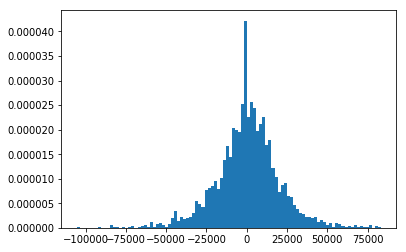

In [45]:
plt.hist(HPnL, normed=True, bins=100);

In [46]:
def bsgamma( S, K, T, r, d, v):
    term1 = np.log(S / K) + (r - d) * T
    term2 = v * v * T
    term3 = np.sqrt(term2)
    term4 = term2/2
        
    dPlus = (term1 + term4) / term3
        
    bsgamma = np.exp(-d * T) * norm.pdf(dPlus) / (S * term3)
        
    return bsgamma
        

In [47]:
options

,Maturity,Days,RF rate,Underlying,PutorCall,BoughtSold,Number of Shares,Strike,Vol,Div Yield,Spot,BS_Price,Price,Delta
0,9/12/2019,129,0.010187,BHP,Call,Bought,20000,39.0,0.2600,0.0414,38.78,2.06629,41325.9,0.480676
1,8/03/2020,219,0.009705,CBA,Put,Bought,15000,75.0,0.2798,0.0580,81.88,4.61319,69197.9,-0.340071
2,12/04/2020,254,0.009443,CBA,Call,Bought,15000,75.0,0.2798,0.0580,81.88,9.36883,140532,0.610902
3,4/05/2020,276,0.009289,WESP,Put,Bought,25000,38.1,0.3056,0.0567,38.86,4.27658,106914,-0.451411
4,7/08/2020,371,0.009026,WESP,Call,Bought,20000,39.0,0.3298,0.0567,38.86,4.05331,81066.1,0.47565
5,6/11/2020,462,0.008754,WPL,Call,Sold,10000,35.0,0.2845,0.0603,33.81,2.74806,27480.6,0.407337
6,6/12/2020,492,0.008665,WPL,Put,Bought,15000,33.0,0.2700,0.0603,33.81,4.73654,71048.1,-0.456532


In [48]:
options['Gamma'] = ""
opt_list=(0,1,2,3,4,5,6)

for x in opt_list:
    maturity = (options.loc[x, 'Days']/365)
    
    options.loc[x, 'Gamma'] =  bsgamma(options.loc[x, 'Spot'], #spot
                 options.loc[x, 'Strike'], #Strike
                 maturity, # T 
                 options.loc[x, 'RF rate'], #RF rate
                 options.loc[x, 'Div Yield '], #div yield
                 options.loc[x, 'Vol'] #vol
                )
        #return bsgamma
        
    
                     
    

In [49]:
options.loc[5,'Gamma'] = options.loc[5,'Gamma']*-1
options

,Maturity,Days,RF rate,Underlying,PutorCall,BoughtSold,Number of Shares,Strike,Vol,Div Yield,Spot,BS_Price,Price,Delta,Gamma
0,9/12/2019,129,0.010187,BHP,Call,Bought,20000,39.0,0.2600,0.0414,38.78,2.06629,41325.9,0.480676,0.0655574
1,8/03/2020,219,0.009705,CBA,Put,Bought,15000,75.0,0.2798,0.0580,81.88,4.61319,69197.9,-0.340071,0.0202024
2,12/04/2020,254,0.009443,CBA,Call,Bought,15000,75.0,0.2798,0.0580,81.88,9.36883,140532,0.610902,0.018871
3,4/05/2020,276,0.009289,WESP,Put,Bought,25000,38.1,0.3056,0.0567,38.86,4.27658,106914,-0.451411,0.036914
4,7/08/2020,371,0.009026,WESP,Call,Bought,20000,39.0,0.3298,0.0567,38.86,4.05331,81066.1,0.47565,0.0291452
5,6/11/2020,462,0.008754,WPL,Call,Sold,10000,35.0,0.2845,0.0603,33.81,2.74806,27480.6,0.407337,-0.0337639
6,6/12/2020,492,0.008665,WPL,Put,Bought,15000,33.0,0.2700,0.0603,33.81,4.73654,71048.1,-0.456532,0.0347003


In [50]:
options['Gamma'] * options['Number of Shares']

0    1311.15
1    303.035
2    283.065
3     922.85
4    582.903
5   -337.639
6    520.505
dtype: object

In [51]:
opt_cum_gamma = {'BHP': 1311.15,
                'CBA': 303.035+283.065,
                'WESP': 922.85 + 582.903,
                'WPL': 520.505}

In [52]:
Hsim_opt_change_gamma = pd.DataFrame()
Hsim_opt_change_gamma = Hist_opt_returns * opt_cum_gamma * Hist_opt_returns/2
Hsim_opt_change_gamma

,BHP,CBA,WESP,WPL
Date,,,,
2009-01-02,0.013799,0.031257,0.212757,0.068437
2009-01-05,0.747232,0.126294,0.212757,0.040809
2009-01-06,0.003203,0.263142,0.328500,0.125917
2009-01-07,0.513813,0.092878,2.498906,0.004451
2009-01-08,2.237539,0.053909,1.291552,1.008587
2009-01-09,0.606893,0.020520,0.155055,0.040204
2009-01-12,0.507737,0.082776,1.948979,0.015892
2009-01-13,0.111819,0.001785,0.646080,0.181333
2009-01-14,0.181132,0.000326,0.633357,0.162601


-31514.131582957718

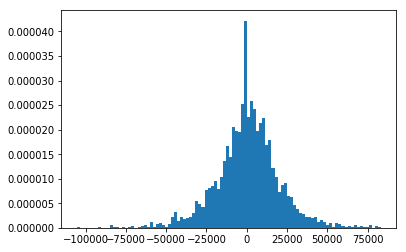

In [107]:
PnL_G = pd.DataFrame(share_unit_ret.sum(axis=1) + Hsim_opt_change_delta.sum(axis=1)+ Hsim_opt_change_gamma.sum(axis=1)) 

HPnL_G = np.array(PnL_G)
HPnL_G.sort
plt.hist(HPnL_G, normed=True, bins=100);
np.percentile(HPnL_G, 5)

In [59]:
Hist_opt_returns1 = pd.DataFrame()
opt_list_name = ('BHP', 'CBA', 'WESP', 'WPL')
for x in opt_list_name:
    Hist_opt_returns1[x] = sharedata[x]
    
histy = list(range(0, len(Hist_opt_returns1)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [97]:
#Hist_opt_returns1.insert(2, 'CBA_2', Hist_opt_returns1['CBA'])
#Hist_opt_returns1.insert(4, 'WESP_2', Hist_opt_returns1['WESP'])
#Hist_opt_returns1.insert(6, 'WPL_2', Hist_opt_returns1['WPL'])
#Hist_opt_returns1

Sim_price_change = Hist_price_change + opt_spot_val
Sim_price_change.insert(2, 'CBA_2', Sim_price_change['CBA'])
Sim_price_change.insert(4, 'WESP_2', Sim_price_change['WESP'])
Sim_price_change.insert(6, 'WPL_2', Sim_price_change['WPL'])
Sim_price_change

,BHP,CBA,CBA_2,WESP,WESP_2,WPL,WPL_2
Date,,,,,,,
2009-01-02,38.957919,82.725633,82.725633,38.206745,38.206745,34.358267,34.358267
2009-01-05,40.089255,80.180197,80.180197,39.513255,39.513255,34.233375,34.233375
2009-01-06,38.865714,84.333588,84.333588,39.671725,39.671725,34.553687,34.553687
2009-01-07,39.865673,80.422318,80.422318,41.098803,41.098803,33.949827,33.949827
2009-01-08,36.514407,80.769452,80.769452,37.250478,37.250478,31.705231,31.705231
2009-01-09,39.959921,82.565173,82.565173,39.417679,39.417679,33.389775,33.389775
2009-01-12,37.700765,80.503872,80.503872,36.882828,36.882828,33.545795,33.545795
2009-01-13,38.273529,82.082071,82.082071,37.721628,37.721628,32.917546,32.917546
2009-01-14,39.424606,81.966367,81.966367,37.732893,37.732893,34.655101,34.655101


In [98]:
##HS for exact option prices 
# use same input and iterate over spot price(?)
tea = (0,1,2,3,4,5,6)
HSoptions_exact1 = pd.DataFrame()
for y in histy:
    for x in tea:
        maturity = (options.iloc[x, 1]/365)
        HSoptions_exact1.loc[y, x] = BlackScholes( options.iloc[x, 4], #callorput
                 Hist_opt_returns1.iloc[y, x], #spot
                 options.loc[x, 'Strike'], #Strike
                 maturity, # T 
                 options.iloc[x, 2], #RF rate
                 options.iloc[x, 9], #div yield
                 options.iloc[x, 8] #vol
                )



In [93]:
HSoptions_exact

,0,1,2,3,4,5,6
0,0.031734,46.803451,2.370854e-05,26.241534,0.000206,3.680765,3.849379
1,0.034524,46.515258,2.926991e-05,26.434768,0.000166,3.966344,3.628131
2,0.062758,47.091548,1.912789e-05,26.241534,0.000206,4.197661,3.462316
3,0.065173,46.255846,3.526442e-05,25.996855,0.000270,4.627319,3.181878
4,0.103672,46.755355,2.456398e-05,25.294918,0.000554,4.711482,3.130711
5,0.038187,47.129986,1.858198e-05,25.803623,0.000331,3.555874,3.952505
6,0.065173,46.899451,2.208172e-05,25.629743,0.000396,3.352725,4.129442
7,0.040019,47.360522,1.559538e-05,26.235115,0.000208,3.229493,4.242789
8,0.031542,47.293303,1.641742e-05,26.569945,0.000142,2.838154,4.637297
9,0.042659,47.264522,1.678132e-05,26.891938,0.000096,3.207768,4.263273


In [99]:
HSoptions_exact1

,0,1,2,3,4,5,6
0,0.031734,46.803451,2.370854e-05,26.241534,0.000206,3.680765,3.849379
1,0.034524,46.515258,2.926991e-05,26.434768,0.000166,3.966344,3.628131
2,0.062758,47.091548,1.912789e-05,26.241534,0.000206,4.197661,3.462316
3,0.065173,46.255846,3.526442e-05,25.996855,0.000270,4.627319,3.181878
4,0.103672,46.755355,2.456398e-05,25.294918,0.000554,4.711482,3.130711
5,0.038187,47.129986,1.858198e-05,25.803623,0.000331,3.555874,3.952505
6,0.065173,46.899451,2.208172e-05,25.629743,0.000396,3.352725,4.129442
7,0.040019,47.360522,1.559538e-05,26.235115,0.000208,3.229493,4.242789
8,0.031542,47.293303,1.641742e-05,26.569945,0.000142,2.838154,4.637297
9,0.042659,47.264522,1.678132e-05,26.891938,0.000096,3.207768,4.263273


In [114]:
np.array(share_unit_ret.sum(axis=1))

array([ -1545.25334588,  23457.60576527,  41119.18098445, ...,
       -12706.60191859,  -1866.55741099, -28970.45136152])

In [119]:
retest = HSoptions_exact1.drop(HSoptions_exact1.index[0]) * options['Number of Shares']
port = retest.sum(axis = 1) + np.array(share_unit_ret.sum(axis=1))

In [120]:
port = port - 522,191.91 

In [121]:
port

(1       1.451310e+06
 2       1.480518e+06
 3       1.479667e+06
 4       1.478168e+06
 5       1.383558e+06
 6       1.455984e+06
 7       1.403297e+06
 8       1.444371e+06
 9       1.482330e+06
 10      1.405763e+06
 11      1.519379e+06
 12      1.537851e+06
 13      1.436284e+06
 14      1.499744e+06
 15      1.549896e+06
 16      1.477372e+06
 17      1.549207e+06
 18      1.608046e+06
 19      1.534327e+06
 20      1.527008e+06
 21      1.519295e+06
 22      1.510418e+06
 23      1.537292e+06
 24      1.464516e+06
 25      1.497714e+06
 26      1.496879e+06
 27      1.513334e+06
 28      1.466747e+06
 29      1.492788e+06
 30      1.479255e+06
             ...     
 2732    5.786293e+05
 2733    5.710852e+05
 2734    5.639432e+05
 2735    6.032196e+05
 2736    5.531284e+05
 2737    5.826122e+05
 2738    5.746582e+05
 2739    5.809286e+05
 2740    5.795418e+05
 2741    5.733706e+05
 2742    5.392151e+05
 2743    5.648924e+05
 2744    5.637090e+05
 2745    5.713022e+05
 2746    5